In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#merge data
mouse_study_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

#cleaning data (count of mice)
mouse_count = len(mouse_study_df['Mouse ID'].value_counts())
mouse_count

249

In [4]:
#cleaning data (checking for duplicates)
duplicate = mouse_study_df[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_id = duplicate['Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
#displaying all duplicate values
duplicate = mouse_study_df[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#drop duplicate data
cleaned_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != duplicate_id[0]]
cleaned_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
#checking to ensure that duplicate was deleted
duplicate_two = cleaned_mouse_study_df[cleaned_mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_two

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [8]:
#checking to ensure correct length is still present
mouse_count = len(cleaned_mouse_study_df['Mouse ID'].value_counts())
mouse_count

248

In [29]:
#summary statistics
#collecting data from dataframe
drug_regimen = cleaned_mouse_study_df.groupby('Drug Regimen')

mean_drug_regimen = drug_regimen['Tumor Volume (mm3)'].mean()
median_drug_regimen = drug_regimen['Tumor Volume (mm3)'].median()
variance_drug_regimen = drug_regimen['Tumor Volume (mm3)'].var()
stdev_drug_regimen = drug_regimen['Tumor Volume (mm3)'].std()
sterror_drug_regimen = drug_regimen['Tumor Volume (mm3)'].sem()
name_drug_regimen = drug_regimen['Drug Regimen'].unique()

#generating dataframe
list_of_tuples = list(zip(name_drug_regimen, mean_drug_regimen, median_drug_regimen, variance_drug_regimen, stdev_drug_regimen, sterror_drug_regimen))
drug_regimen_df = pd.DataFrame(list_of_tuples,columns = ['Drug_Regimen', 'Mean_Tumor_Volume', 'Median_Tumor_Volume', 'Tumor_Volume_Variance', 'Tumor_Volume_Std.Dev.', 'Tumor_Volume_Std.Error'])

#formatting
drug_regimen_df['Drug_Regimen'] = drug_regimen_df['Drug_Regimen'].str[0]
drug_regimen_df = drug_regimen_df.set_index('Drug_Regimen')
drug_regimen_df


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std.Dev.,Tumor_Volume_Std.Error
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
#aggregate method
summary_drug_regimen_df = drug_regimen.aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<AxesSubplot:xlabel='Drug Regimen'>

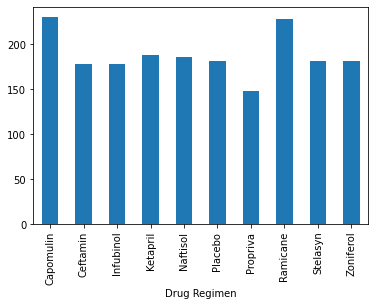

In [45]:
#generating bar graph using pandas
drug_and_mouse_count = drug_regimen['Drug Regimen'].count()

drug_and_mouse_count.plot(kind="bar")


In [ ]:
#generating bar graph using pyplot

x_axis = len(name_drug_regimen)